## Code Modules & Functions

In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd,numpy as np,tensorflow as tf
import os,pylab as pl
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neural_network import MLPClassifier
from keras.preprocessing import image as kimage
from tqdm import tqdm
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True 
fpath='../input/tomato-cultivars/'

Using TensorFlow backend.


In [2]:
def path_to_tensor(img_path,fpath=fpath):
    img=kimage.load_img(fpath+img_path, 
                        target_size=(160,160))
    x=kimage.img_to_array(img)
    return np.expand_dims(x,axis=0)
def paths_to_tensor(img_paths):
    tensor_list=[path_to_tensor(img_path) 
                 for img_path in tqdm(img_paths)]
    return np.vstack(tensor_list)

## Data

In [3]:
names=['Kumato','Beefsteak','Tigerella',
       'Roma','Japanese Black Trifele',
       'Yellow Pear','Sun Gold','Green Zebra',
       'Cherokee Purple','Oxheart','Blue Berries']
flist=sorted(os.listdir(fpath))
labels=np.array([int(el[:2]) for el in flist],
               dtype='int32')-1
images=np.array(paths_to_tensor(flist),
                dtype='float32')/255
N=labels.shape[0]; n=int(.2*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
images,labels=images[shuffle_ids],labels[shuffle_ids]
x_test,x_train=images[:n],images[n:]
y_test,y_train=labels[:n],labels[n:]

100%|██████████| 479/479 [00:02<00:00, 196.90it/s]


In [4]:
pd.DataFrame([[x_train.shape,x_test.shape],
              [x_train.dtype,x_test.dtype],
              [y_train.shape,y_test.shape],
              [y_train.dtype,y_test.dtype]],               
             columns=['train','test'])

,train,test
0,"(384, 160, 160, 3)","(95, 160, 160, 3)"
1,float32,float32
2,"(384,)","(95,)"
3,int32,int32


Label:  0 Kumato


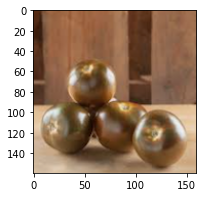

In [5]:
k=np.random.randint(40)
print('Label: ',y_test[k],
      names[y_test[k]])
pl.figure(figsize=(3,3))
pl.imshow((x_test[k]));

In [6]:
x_train=x_train.reshape(-1,160*160*3)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,160*160*3)
y_test=y_test.reshape(-1,1)

## Sklearn Classifiers

In [7]:
def classifier_fit_score(classifier,x_train,x_test,y_train,y_test):
    classifier.fit(x_train,y_train)     
    y_clf_train=classifier.predict(x_train)
    y_clf_test=classifier.predict(x_test)        
    acc_clf_train=round(accuracy_score(y_train,y_clf_train),4)
    acc_clf_test=round(accuracy_score(y_test,y_clf_test),4) 
    loss_clf_train=round(hamming_loss(y_train,y_clf_train),4)
    loss_clf_test=round(hamming_loss(y_test,y_clf_test),4)  
    return [y_clf_train,y_clf_test,acc_clf_train,acc_clf_test,
            loss_clf_train,loss_clf_test]

In [8]:
[y_rfc_train,y_rfc_test,acc_rfc_train,
 acc_rfc_test,loss_rfc_train,loss_rfc_test]=\
classifier_fit_score(RFC(),x_train,x_test,y_train,y_test)
print(classification_report(y_test,y_rfc_test))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.60      0.50      0.55         6
           2       0.42      0.62      0.50         8
           3       0.50      0.25      0.33         8
           4       0.50      0.43      0.46         7
           5       0.36      0.67      0.47         6
           6       0.55      0.55      0.55        11
           7       0.64      0.70      0.67        10
           8       0.22      0.29      0.25         7
           9       0.75      0.33      0.46         9
          10       0.60      0.60      0.60        10

    accuracy                           0.53        95
   macro avg       0.53      0.51      0.50        95
weighted avg       0.56      0.53      0.53        95



In [9]:
[y_lsvc_train,y_lsvc_test,acc_lsvc_train,
 acc_lsvc_test,loss_lsvc_train,loss_lsvc_test]=\
classifier_fit_score(svm.LinearSVC(),
                     x_train,x_test,y_train,y_test)
print(classification_report(y_test,y_lsvc_test))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.31      0.67      0.42         6
           2       0.50      0.50      0.50         8
           3       0.80      0.50      0.62         8
           4       0.25      0.14      0.18         7
           5       0.43      1.00      0.60         6
           6       0.62      0.45      0.53        11
           7       0.58      0.70      0.64        10
           8       0.08      0.14      0.11         7
           9       0.25      0.11      0.15         9
          10       0.25      0.10      0.14        10

    accuracy                           0.44        95
   macro avg       0.44      0.45      0.41        95
weighted avg       0.46      0.44      0.43        95



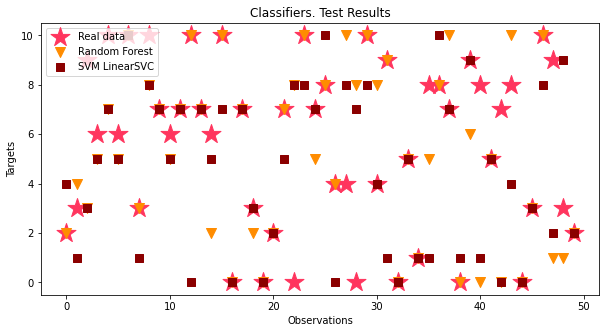

In [10]:
pl.figure(figsize=(10,5)); t=50; x=range(t)
pl.scatter(x,y_test[:t],marker='*',s=400,
           color='#ff355e',label='Real data')
pl.scatter(x,y_rfc_test[:t],marker='v',
           s=100,color='darkorange',label='Random Forest')
pl.scatter(x,y_lsvc_test[:t],marker='s',s=50,
           color='darkred',label='SVM LinearSVC')
pl.xlabel('Observations'); pl.ylabel('Targets') 
pl.title('Classifiers. Test Results')
pl.legend(loc=2,fontsize=10); pl.show()

In [11]:
[y_knc_train,y_knc_test,acc_knc_train,
 acc_knc_test,loss_knc_train,loss_knc_test]=\
classifier_fit_score(KNC(),x_train,x_test,y_train,y_test)
print(classification_report(y_test,y_knc_test))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.25      0.17      0.20         6
           2       0.41      0.88      0.56         8
           3       0.50      0.62      0.56         8
           4       0.33      0.14      0.20         7
           5       0.29      0.67      0.40         6
           6       0.00      0.00      0.00        11
           7       0.50      0.60      0.55        10
           8       0.33      0.57      0.42         7
           9       0.29      0.22      0.25         9
          10       0.60      0.30      0.40        10

    accuracy                           0.44        95
   macro avg       0.39      0.44      0.39        95
weighted avg       0.41      0.44      0.40        95



In [12]:
mlpc=MLPClassifier(hidden_layer_sizes=(512,),
                   max_iter=60,solver='sgd',
                   verbose=1,random_state=1,
                   learning_rate_init=.005)
[y_mlpc_train,y_mlpc_test,acc_mlpc_train,
 acc_mlpc_test,loss_mlpc_train,loss_mlpc_test]=\
classifier_fit_score(mlpc,x_train,x_test,y_train,y_test)

Iteration 1, loss = 3.67212430
Iteration 2, loss = 7.77360670
Iteration 3, loss = 8.57354469
Iteration 4, loss = 4.56638435
Iteration 5, loss = 2.22796727
Iteration 6, loss = 2.10112596
Iteration 7, loss = 1.97382475
Iteration 8, loss = 1.83749910
Iteration 9, loss = 1.69379274
Iteration 10, loss = 1.59002394
Iteration 11, loss = 1.53043515
Iteration 12, loss = 1.39461488
Iteration 13, loss = 1.27082491
Iteration 14, loss = 1.36245995
Iteration 15, loss = 1.24203413
Iteration 16, loss = 1.30595594
Iteration 17, loss = 1.10673995
Iteration 18, loss = 1.00973105
Iteration 19, loss = 0.95307153
Iteration 20, loss = 0.99825579
Iteration 21, loss = 0.92484622
Iteration 22, loss = 0.85104869
Iteration 23, loss = 0.88306846
Iteration 24, loss = 0.74662279
Iteration 25, loss = 0.72069678
Iteration 26, loss = 0.66629480
Iteration 27, loss = 0.63368106
Iteration 28, loss = 0.59485349
Iteration 29, loss = 0.61075213
Iteration 30, loss = 0.56386405
Iteration 31, loss = 0.53521073
Iteration 32, los

In [13]:
print(classification_report(y_test,y_mlpc_test))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.33      0.67      0.44         6
           2       0.55      0.75      0.63         8
           3       0.40      0.25      0.31         8
           4       0.67      0.29      0.40         7
           5       0.43      1.00      0.60         6
           6       0.50      0.27      0.35        11
           7       0.69      0.90      0.78        10
           8       0.00      0.00      0.00         7
           9       0.17      0.11      0.13         9
          10       0.44      0.40      0.42        10

    accuracy                           0.49        95
   macro avg       0.46      0.49      0.45        95
weighted avg       0.49      0.49      0.47        95



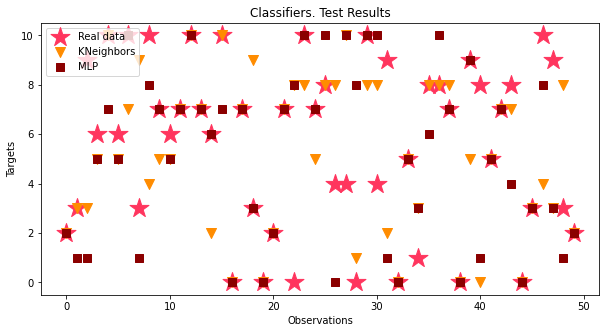

In [14]:
pl.figure(figsize=(10,5)); t=50; x=range(t)
pl.scatter(x,y_test[:t],marker='*',s=400,
           color='#ff355e',label='Real data')
pl.scatter(x,y_knc_test[:t],marker='v',
           s=100,color='darkorange',label='KNeighbors')
pl.scatter(x,y_mlpc_test[:t],marker='s',s=50,
           color='darkred',label='MLP')
pl.xlabel('Observations'); pl.ylabel('Targets') 
pl.title('Classifiers. Test Results')
pl.legend(loc=2,fontsize=10); pl.show()

In [15]:
acc_train=[acc_rfc_train,acc_lsvc_train,
           acc_knc_train,acc_mlpc_train]
acc_test=[acc_rfc_test,acc_lsvc_test,
          acc_knc_test,acc_mlpc_test]
loss_train=[loss_rfc_train,loss_lsvc_train,
            loss_knc_train,loss_mlpc_train]
loss_test=[loss_rfc_test,loss_lsvc_test,
           loss_knc_test,loss_mlpc_test]
cols=['Random Forest','SVM LinearSVC',
      'KNeighbors','MLP']
pd.DataFrame([acc_train,acc_test,
              loss_train,loss_test],
            index=['accuracy train','accuracy test',
                   'loss train','loss test'],
            columns=cols)

,Random Forest,SVM LinearSVC,KNeighbors,MLP
accuracy train,1.0000,1.0000,0.6250,1.0000
accuracy test,0.5263,0.4421,0.4421,0.4947
loss train,0.0000,0.0000,0.3750,0.0000
loss test,0.4737,0.5579,0.5579,0.5053
